In [78]:
import numpy as np
import pandas as pd
import os
from pypinyin import pinyin, lazy_pinyin, Style
import matplotlib.pyplot as plt
import econtools.metrics as mt


### NSFC data

In [79]:
ms_all = pd.read_csv("/Users/yansong/Nutstore Files/基金研究/data/2013--2022面青/ms_senti.csv")

In [80]:
ms_all.head(1)

,Unnamed: 0,申请人,申请部门,年份,立项,Senti
0,1249,ALEXANDER DEGELING,威海校区,2017,1,0.947146


In [81]:
ms_all = ms_all[['申请人','申请部门','年份','立项','Senti']]
ms_all.rename(columns={'年份':'year','Senti':'senti'},inplace=True)
#ms_all['立项年份'] = ms_all['year']*ms_all['立项']
#ms_all = pd.DataFrame(ms_all.groupby(['申请人']).立项年份.max()).reset_index()
ms_all.shape

(3080, 5)

In [82]:
ms_all['year'].value_counts()

year
2020    609
2019    547
2018    439
2017    396
2015    395
2016    374
2014    320
Name: count, dtype: int64

In [83]:
ms_all.head(1)

,申请人,申请部门,year,立项,senti
0,ALEXANDER DEGELING,威海校区,2017,1,0.947146


In [84]:
def pinyin(name):
    i = lazy_pinyin(name)
    if len(i) == 3:
        capitalized = [str.capitalize(i[0]),str.capitalize(i[1]+i[2])]
    elif len(i) == 2:
        capitalized = [str.capitalize(i[0]),str.capitalize(i[1])]
    else:
        print(i)
        capitalized = i
    return capitalized

def surname(name):
    i = lazy_pinyin(name)
    if len(i) == 3:
        capitalized = str.capitalize(i[0])
    elif len(i) == 2:
        capitalized = str.capitalize(i[0])
    else:
        print(i)
        capitalized = i[0]
    return capitalized

def givenname(name):
    i = lazy_pinyin(name)
    if len(i) == 3:
        capitalized = str.capitalize(i[1]+i[2])
    elif len(i) == 2:
        capitalized = str.capitalize(i[1])
    else:
        print(i)
        capitalized = i[0]
    return capitalized

In [85]:
ms_all['pinyin']= ms_all['申请人'].apply(pinyin)
ms_all['surname'] = ms_all['申请人'].apply(surname)
ms_all['givenname'] = ms_all['申请人'].apply(givenname)
ms_all['author_name'] = ms_all['surname']+' '+ms_all['givenname']
ms_all = ms_all.sort_values(['申请人','year']).reset_index()

['ALEXANDER DEGELING']
['ALEXANDER DEGELING']
['ALEXANDER DEGELING']
['Abdelwahid MELLOUKI']
['Balan Nanan']
['Balan Nanan']
['DONG MING WANG']
['Hartmut Günter Dr. Herrmann']
['Hiroshi Rikimaru']
['Hiroshi Rikimaru']
['Jeongwoo Lee']
['Jong-Sun Park']
['Kaufmann']
['Kaufmann']
['Motoharu Nowada']
['Motoharu Nowada']
['Rolf Müller']
['Rolf Müller']
['Rolf Müller']
['Timo Pitknen']
['XU GUANGWU']
['ALEXANDER DEGELING']
['ALEXANDER DEGELING']
['ALEXANDER DEGELING']
['Abdelwahid MELLOUKI']
['Balan Nanan']
['Balan Nanan']
['DONG MING WANG']
['Hartmut Günter Dr. Herrmann']
['Hiroshi Rikimaru']
['Hiroshi Rikimaru']
['Jeongwoo Lee']
['Jong-Sun Park']
['Kaufmann']
['Kaufmann']
['Motoharu Nowada']
['Motoharu Nowada']
['Rolf Müller']
['Rolf Müller']
['Rolf Müller']
['Timo Pitknen']
['XU GUANGWU']
['ALEXANDER DEGELING']
['ALEXANDER DEGELING']
['ALEXANDER DEGELING']
['Abdelwahid MELLOUKI']
['Balan Nanan']
['Balan Nanan']
['DONG MING WANG']
['Hartmut Günter Dr. Herrmann']
['Hiroshi Rikimaru']
['Hir

In [86]:
#ms_nsfc = ms_all.groupby(['申请人','author_name'])['author_name','立项年份'].mean().reset_index()
ms_nsfc = ms_all
ms_nsfc['year'] = ms_nsfc['year'].astype('int64')
ms_nsfc = ms_nsfc[['author_name','申请人','申请部门','year','立项','senti']].reset_index().drop(['index'],axis=1)
ms_nsfc.head(1)

,author_name,申请人,申请部门,year,立项,senti
0,ALEXANDER DEGELING ALEXANDER DEGELING,ALEXANDER DEGELING,威海校区,2017,1,0.947146


In [87]:
ms_nsfc['duplicated'] = ms_nsfc.duplicated(['author_name','申请部门','year'],keep=False)
ms_nsfc['dup_index'] = ms_nsfc.groupby(['author_name','申请部门']).duplicated.transform('max')
ms_nsfc_nodups = ms_nsfc[ms_nsfc['dup_index']==False]
ms_nsfc_nodups.head()

,author_name,申请人,申请部门,year,立项,senti,duplicated,dup_index
0,ALEXANDER DEGELING ALEXANDER DEGELING,ALEXANDER DEGELING,威海校区,2017,1,0.947146,False,False
1,ALEXANDER DEGELING ALEXANDER DEGELING,ALEXANDER DEGELING,威海校区,2019,0,0.530679,False,False
2,ALEXANDER DEGELING ALEXANDER DEGELING,ALEXANDER DEGELING,威海校区,2020,0,0.338701,False,False
3,Abdelwahid MELLOUKI Abdelwahid MELLOUKI,Abdelwahid MELLOUKI,环境研究院,2019,1,0.643676,False,False
4,Balan Nanan Balan Nanan,Balan Nanan,威海校区,2019,0,0.297389,False,False


In [88]:
ms_nsfc_nodups.shape

(2722, 8)

In [89]:
#ms_nsfc_nodups.pivot(index='author_name', columns='year', values=['立项','senti'])
# f = lambda x: x.set_index('year').reindex(range(2003, 2022))
# ms_nsfc_filled = ms_nsfc_nodups.groupby('author_name').apply(f).drop(columns='author_name').reset_index().fillna({'立项':0}, downcast='int')
# ms_nsfc_filled =ms_nsfc_filled[['author_name','year','立项','senti']]
# ms_nsfc_filled.head(10)

### Publication data

- Consolidate all publications with unique author eid
- Consolidate all author_eids
- Merge the two using author_eid 
- Reshape to wide format

### 读取论文数据

In [90]:
root_dir = "/Users/yansong/Nutstore Files/论文发表2013-2020/ms_scopusPub/xlsx"
authors = os.listdir(root_dir)
os.chdir(root_dir)
lists_pubs = []
for author_file in authors:
    if '.xlsx' in author_file:
        author_pubs = pd.read_excel(author_file)
        if 'school 1' in author_pubs.columns:
            author_pubs = author_pubs[['affilname', 'afid', 'author_eid', 'author_names',
           'citedby_count', 'coverDate', 'doi', 'eid', 'title', 'school 1']]
            author_pubs.rename(columns={'school 1':'school_1'},inplace=True)
            lists_pubs.append(author_pubs)            
        elif 'school1' in author_pubs.columns:
            author_pubs = author_pubs[['affilname', 'afid', 'author_eid', 'author_names',
           'citedby_count', 'coverDate', 'doi', 'eid', 'title', 'school1']]
            author_pubs.rename(columns={'school1':'school_1'},inplace=True)
            lists_pubs.append(author_pubs)            
        elif 'school1' in author_pubs.columns:
            author_pubs = author_pubs[['affilname', 'afid', 'author_eid', 'author_names',
           'citedby_count', 'coverDate', 'doi', 'eid', 'title', 'school1']]
            author_pubs.rename(columns={'school1':'school_1'},inplace=True)
            lists_pubs.append(author_pubs)
        elif 'School1' in author_pubs.columns:
            author_pubs = author_pubs[['affilname', 'afid', 'author_eid', 'author_names',
           'citedby_count', 'coverDate', 'doi', 'eid', 'title', 'School1']]
            author_pubs.rename(columns={'School1':'school_1'},inplace=True)
            lists_pubs.append(author_pubs)            
        else:
            print(author_file)
ms_pubs = pd.concat(lists_pubs)   
ms_pubs['author_eid'] = pd.to_numeric(ms_pubs['author_eid'], errors='coerce')

ChenYan_转自CSV.xlsx
HaoAiyou_转自CSV.xlsx
BianZhongguo_转自CSV.xlsx
BaiMing_转自CSV.xlsx
ZhouJun_转自CSV.xlsx
XiaoHua_转自CSV.xlsx
HanBo_转自CSV.xlsx
HanBing_转自CSV.xlsx
MaChen_转自CSV.xlsx
WangTao_转自CSV.xlsx
ChenJian_转自CSV.xlsx


/var/folders/kp/gk4kvr5s0plbp5y3112cx_x00000gn/T/ipykernel_6825/4032490981.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ms_pubs = pd.concat(lists_pubs)


In [91]:
len(ms_pubs.author_eid.unique())

4825

In [92]:
type(ms_pubs['author_eid'].iloc[0])

numpy.int64

### 读取作者数据

In [93]:
root_dir = "/Users/yansong/Nutstore Files/基金研究/data/2013--2022面青/ms_scopus"
authors = os.listdir(root_dir)
os.chdir(root_dir)
unique_lists = []

for author_file in authors:
    if '.csv' in author_file:
        author_pubs = pd.read_csv(author_file)
        unique_lists.append(author_pubs)

author_ids = pd.concat(unique_lists)
author_ids['author_eid']= author_ids['eid'].str.split("-").str.get(2)
author_ids['author_eid'] = author_ids['author_eid'].astype('int64')
author_ids.drop(columns=['eid'],inplace=True)

In [94]:
len(author_ids.author_eid.unique())

4880

### 匹配作者和文章(merge on author_eid)

In [95]:
ms_author_pubs = ms_pubs.merge(author_ids,how='left',on='author_eid',indicator=True)


In [96]:
ms_author_pubs._merge.value_counts()

_merge
both          130537
left_only          0
right_only         0
Name: count, dtype: int64

In [97]:
ms_author_pubs['date'] = ms_author_pubs['coverDate'].apply(str)
ms_author_pubs['year'] = ms_author_pubs['date'].str[0:4]
ms_author_pubs['author_name'] = ms_author_pubs['surname']+' ' +ms_author_pubs['givenname']

In [98]:
ms_author_pubs.head(1)

,affilname,afid,author_eid,author_names,citedby_count,coverDate,doi,eid,title,school_1,...,affiliation,documents,affiliation_id,city,country,areas,_merge,date,year,author_name
0,Shandong University,60031031,55631012900,"Shi, Yongsen;Xue, Hanhan;Li, Jingyi;Yao, Yilin...",0,2023-03-01,10.1016/j.jenvman.2022.117010,2-s2.0-85145740623,Response of methanogenic system to long-term p...,环境科学与工程学院,...,Jiangnan University,77,60007029,Wuxi,China,ENVI (142); CENG (33); ENER (27),both,2023-03-01 00:00:00,2023,Niu Qigui


In [99]:
ms_author_pubs['citations'] = pd.to_numeric(ms_author_pubs['citedby_count'], errors='coerce')

### Transform the data to author by school 1 by year
- 1st: 生成论文数据
- 2nd: 引用数据
- 3rd: 平均每篇文章合作者数据
- 4th: 平均每年合作者数据

In [25]:
# ms_author_year_pubs4 = ms_author_pubs.groupby(['author_name','school_1','year'])['author_names'].apply('/'.join).reset_index()
# ms_author_year_pubs4['unique_coauthors'] = ms_author_year_pubs4.author_names.str.count(';')
# ms_author_year_pubs4.head(1)


In [100]:
ms_author_pubs['coauthors'] = ms_author_pubs.author_names.str.count(';')
ms_author_year_pubs3 = ms_author_pubs.groupby(['author_name','school_1','year'])['coauthors'].mean().reset_index()
ms_author_year_pubs3.head(1)

,author_name,school_1,year,coauthors
0,Bai Lihui,物理学院,2005,6.0


In [101]:
#ms_author_year_pubs = ms_author_pubs.groupby(['author_name','school_1','year'])['author_eid'].count()
ms_author_year_pubs1 = ms_author_pubs.groupby(['author_name','school_1','year'])['author_eid'].count().reset_index()
ms_author_year_pubs2 = ms_author_pubs.groupby(['author_name','school_1','year'])['citations'].sum().reset_index()
ms_author_year_pubs  = ms_author_year_pubs1.merge(ms_author_year_pubs2,how='left',
                                                  on=['author_name','school_1','year'],indicator=True)
ms_author_year_pubs.drop(columns=['_merge'],inplace=True,errors='ignore')


#### Merge the coauthors data

In [102]:
ms_author_year_pubs = ms_author_year_pubs.merge(ms_author_year_pubs3,how='left',
                                                  on=['author_name','school_1','year'],indicator=True)
ms_author_year_pubs.drop(columns=['_merge'],inplace=True,errors='ignore')
ms_author_year_pubs.head(1)

,author_name,school_1,year,author_eid,citations,coauthors
0,Bai Lihui,物理学院,2005,4,16,6.0


#### Merge the unique coauthors data

In [103]:
# ms_author_year_pubs = ms_author_year_pubs.merge(ms_author_year_pubs4,how='left',
#                                                   on=['author_name','school_1','year'],indicator=True)
# ms_author_year_pubs.drop(columns=['_merge'],inplace=True,errors='ignore')
# ms_author_year_pubs.head(1)

In [104]:
ms_author_year_pubs = ms_author_year_pubs.reset_index()

In [105]:
ms_author_year_pubs['year'] = ms_author_year_pubs.year.astype('int64')

In [106]:
ms_author_year_pubs.head(1)

,index,author_name,school_1,year,author_eid,citations,coauthors
0,0,Bai Lihui,物理学院,2005,4,16,6.0


In [107]:
ms_author_year_pubs.shape

(24711, 7)

In [108]:
ms_author_year_pubs = ms_author_year_pubs[ms_author_year_pubs['year']>=2003]

In [110]:
ms_author_year_pubs.head(10)

,index,author_name,school_1,year,author_eid,citations,coauthors
0,0,Bai Lihui,物理学院,2005,4,16,6.000000
1,1,Bai Lihui,物理学院,2006,8,40,7.750000
2,2,Bai Lihui,物理学院,2007,6,178,7.833333
3,3,Bai Lihui,物理学院,2008,2,211,7.500000
4,4,Bai Lihui,物理学院,2009,1,1,4.000000
5,5,Bai Lihui,物理学院,2010,1,2,2.000000
6,6,Bai Lihui,物理学院,2011,2,28,5.000000
7,7,Bai Lihui,物理学院,2012,1,4,3.000000
8,8,Bai Lihui,物理学院,2013,3,181,4.333333
9,9,Bai Lihui,物理学院,2014,3,58,6.666667


In [111]:
df = ms_author_year_pubs
df.head(1)

,index,author_name,school_1,year,author_eid,citations,coauthors
0,0,Bai Lihui,物理学院,2005,4,16,6.0


In [112]:
f = lambda x: x.set_index('year').reindex(range(2003, 2022))
df_filled = df.groupby(['author_name','school_1']).apply(f).drop(columns=['author_name','school_1']).reset_index().fillna({'author_eid':0}, downcast='int')
df_filled.head(10)



/var/folders/kp/gk4kvr5s0plbp5y3112cx_x00000gn/T/ipykernel_6825/4121535855.py:2: FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
  df_filled = df.groupby(['author_name','school_1']).apply(f).drop(columns=['author_name','school_1']).reset_index().fillna({'author_eid':0}, downcast='int')


,author_name,school_1,year,index,author_eid,citations,coauthors
0,Bai Lihui,物理学院,2003,NaN,0,NaN,NaN
1,Bai Lihui,物理学院,2004,NaN,0,NaN,NaN
2,Bai Lihui,物理学院,2005,0.0,4,16.0,6.000000
3,Bai Lihui,物理学院,2006,1.0,8,40.0,7.750000
4,Bai Lihui,物理学院,2007,2.0,6,178.0,7.833333
5,Bai Lihui,物理学院,2008,3.0,2,211.0,7.500000
6,Bai Lihui,物理学院,2009,4.0,1,1.0,4.000000
7,Bai Lihui,物理学院,2010,5.0,1,2.0,2.000000
8,Bai Lihui,物理学院,2011,6.0,2,28.0,5.000000
9,Bai Lihui,物理学院,2012,7.0,1,4.0,3.000000


In [113]:
df_filled.shape

(46740, 7)

In [114]:
df_filled['lagged_1'] = df.groupby(['author_name'])['author_eid'].shift(1)


In [115]:
df_filled['rolling_sum']= df_filled.groupby('author_name')['author_eid'].\
                        transform(lambda s: s.rolling(2, min_periods=2).sum().shift(-1))

In [116]:
df_filled['rolling_sum3']= df_filled.groupby('author_name')['author_eid'].\
                        transform(lambda s: s.rolling(3, min_periods=3).sum().shift(-2))

In [117]:
df_filled['rolling_sum4']= df_filled.groupby('author_name')['author_eid'].\
                        transform(lambda s: s.rolling(4, min_periods=4).sum().shift(-3))

In [118]:
df_filled['rolling_sum5']= df_filled.groupby('author_name')['author_eid'].\
                        transform(lambda s: s.rolling(5, min_periods=5).sum().shift(-4))

In [119]:
df_filled.head(20)

,author_name,school_1,year,index,author_eid,citations,coauthors,lagged_1,rolling_sum,rolling_sum3,rolling_sum4,rolling_sum5
0,Bai Lihui,物理学院,2003,NaN,0,NaN,NaN,NaN,0.0,4.0,12.0,18.0
1,Bai Lihui,物理学院,2004,NaN,0,NaN,NaN,4.0,4.0,12.0,18.0,20.0
2,Bai Lihui,物理学院,2005,0.0,4,16.0,6.000000,8.0,12.0,18.0,20.0,21.0
3,Bai Lihui,物理学院,2006,1.0,8,40.0,7.750000,6.0,14.0,16.0,17.0,18.0
4,Bai Lihui,物理学院,2007,2.0,6,178.0,7.833333,2.0,8.0,9.0,10.0,12.0
5,Bai Lihui,物理学院,2008,3.0,2,211.0,7.500000,1.0,3.0,4.0,6.0,7.0
6,Bai Lihui,物理学院,2009,4.0,1,1.0,4.000000,1.0,2.0,4.0,5.0,8.0
7,Bai Lihui,物理学院,2010,5.0,1,2.0,2.000000,2.0,3.0,4.0,7.0,10.0
8,Bai Lihui,物理学院,2011,6.0,2,28.0,5.000000,1.0,3.0,6.0,9.0,15.0
9,Bai Lihui,物理学院,2012,7.0,1,4.0,3.000000,3.0,4.0,7.0,13.0,18.0


### 匹配自科和论文数据 （on author_eid and 申请部门 and year）

In [120]:
df_filled.head(1)

,author_name,school_1,year,index,author_eid,citations,coauthors,lagged_1,rolling_sum,rolling_sum3,rolling_sum4,rolling_sum5
0,Bai Lihui,物理学院,2003,NaN,0,NaN,NaN,NaN,0.0,4.0,12.0,18.0


In [121]:
df_filled.rename(columns={'school_1':'申请部门'},inplace=True)

In [122]:
df_filled.shape

(46740, 12)

In [123]:
ms_nsfc.shape

(3080, 8)

In [125]:
#ms_nsfc_pubs = df_filled.merge(ms_nsfc_nodups,how='left',on=['author_name','year'],indicator=True)
ms_nsfc_pubs = df_filled.merge(ms_nsfc_nodups,how='left',on=['author_name','申请部门','year'],indicator=True)


In [126]:
ms_nsfc_pubs._merge.value_counts()

_merge
left_only     45509
both           1231
right_only        0
Name: count, dtype: int64

In [127]:
ms_nsfc_pubs.shape

(46740, 18)

In [128]:
# ms_nsfc_pubs.sort_values(['author_name','申请部门','year'],inplace=True)

In [129]:
ms_nsfc_pubs.head(20)

,author_name,申请部门,year,index,author_eid,citations,coauthors,lagged_1,rolling_sum,rolling_sum3,rolling_sum4,rolling_sum5,申请人,立项,senti,duplicated,dup_index,_merge
0,Bai Lihui,物理学院,2003,NaN,0,NaN,NaN,NaN,0.0,4.0,12.0,18.0,NaN,NaN,NaN,NaN,NaN,left_only
1,Bai Lihui,物理学院,2004,NaN,0,NaN,NaN,4.0,4.0,12.0,18.0,20.0,NaN,NaN,NaN,NaN,NaN,left_only
2,Bai Lihui,物理学院,2005,0.0,4,16.0,6.000000,8.0,12.0,18.0,20.0,21.0,NaN,NaN,NaN,NaN,NaN,left_only
3,Bai Lihui,物理学院,2006,1.0,8,40.0,7.750000,6.0,14.0,16.0,17.0,18.0,NaN,NaN,NaN,NaN,NaN,left_only
4,Bai Lihui,物理学院,2007,2.0,6,178.0,7.833333,2.0,8.0,9.0,10.0,12.0,NaN,NaN,NaN,NaN,NaN,left_only
5,Bai Lihui,物理学院,2008,3.0,2,211.0,7.500000,1.0,3.0,4.0,6.0,7.0,NaN,NaN,NaN,NaN,NaN,left_only
6,Bai Lihui,物理学院,2009,4.0,1,1.0,4.000000,1.0,2.0,4.0,5.0,8.0,NaN,NaN,NaN,NaN,NaN,left_only
7,Bai Lihui,物理学院,2010,5.0,1,2.0,2.000000,2.0,3.0,4.0,7.0,10.0,NaN,NaN,NaN,NaN,NaN,left_only
8,Bai Lihui,物理学院,2011,6.0,2,28.0,5.000000,1.0,3.0,6.0,9.0,15.0,NaN,NaN,NaN,NaN,NaN,left_only
9,Bai Lihui,物理学院,2012,7.0,1,4.0,3.000000,3.0,4.0,7.0,13.0,18.0,NaN,NaN,NaN,NaN,NaN,left_only


In [130]:
ms_nsfc_pubs['立项年份'] = ms_nsfc_pubs['立项']*ms_nsfc_pubs['year']
ms_nsfc_pubs['立项年份'] = ms_nsfc_pubs.groupby(['author_name']).立项年份.transform(max)

/var/folders/kp/gk4kvr5s0plbp5y3112cx_x00000gn/T/ipykernel_6825/3470458842.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ms_nsfc_pubs['立项年份'] = ms_nsfc_pubs.groupby(['author_name']).立项年份.transform(max)


In [132]:
ms_nsfc_pubs['立项年份'].value_counts()

立项年份
0.0       11229
2020.0     3097
2019.0     1881
2018.0     1653
2015.0     1520
2016.0     1045
2017.0      931
Name: count, dtype: int64

In [133]:
ms_nsfc_pubs['grant_t'] = ms_nsfc_pubs['year'].astype('int64')-ms_nsfc_pubs['立项年份']
ms_nsfc_pubs.loc[ms_nsfc_pubs['立项年份']==0,'grant_t'] = 0
ms_nsfc_pubs['after_grant'] = ms_nsfc_pubs['grant_t'] >=0
ms_nsfc_pubs['after_grant'] = ms_nsfc_pubs['after_grant'].astype('int64')

<Axes: xlabel='grant_t', ylabel='rolling_sum'>

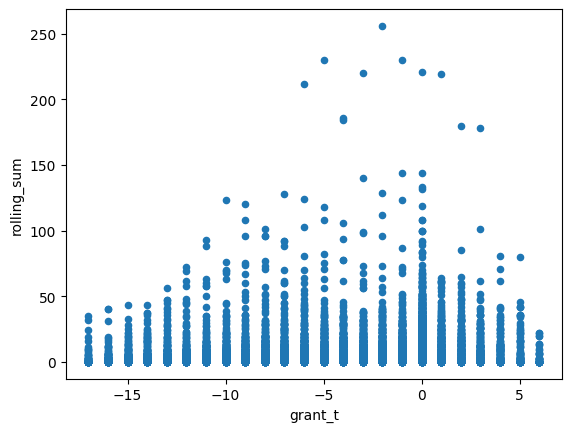

In [135]:
ms_nsfc_pubs.plot.scatter(x='grant_t',y='rolling_sum')

In [136]:
ms_nsfc_pubs.columns

Index(['author_name', '申请部门', 'year', 'index', 'author_eid', 'citations',
       'coauthors', 'lagged_1', 'rolling_sum', 'rolling_sum3', 'rolling_sum4',
       'rolling_sum5', '申请人', '立项', 'senti', 'duplicated', 'dup_index',
       '_merge', '立项年份', 'grant_t', 'after_grant'],
      dtype='object')

In [137]:
ms_nsfc_pubs['senti_squared'] =ms_nsfc_pubs['senti']*ms_nsfc_pubs['senti']
ms_nsfc_pubs['below_cutoff'] = ms_nsfc_pubs['senti']<0.5

In [138]:
ms_nsfc_pubs['experience']  =  ms_nsfc_pubs['year'] - ms_nsfc_pubs.groupby(['author_name']).year.transform(min)

/var/folders/kp/gk4kvr5s0plbp5y3112cx_x00000gn/T/ipykernel_6825/289234016.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  ms_nsfc_pubs['experience']  =  ms_nsfc_pubs['year'] - ms_nsfc_pubs.groupby(['author_name']).year.transform(min)


## Regressions

In [139]:
ms_nsfc_pubs.to_csv("/Users/yansong/Nutstore Files/基金研究/data/2013--2022面青/ms_reg_type2.csv")

### OLS

In [65]:
ms_nsfc_pubs.head()

,author_name,申请部门,year,index,author_eid,citations,coauthors,lagged_1,rolling_sum,rolling_sum3,...,senti,duplicated,dup_index,_merge,立项年份,grant_t,after_grant,senti_squared,below_cutoff,experience
0,Bai Lihui,物理学院,2003,NaN,0,NaN,NaN,NaN,0.0,4.0,...,NaN,NaN,NaN,left_only,2017.0,-14.0,0,NaN,False,0
1,Bai Lihui,物理学院,2004,NaN,0,NaN,NaN,4.0,4.0,12.0,...,NaN,NaN,NaN,left_only,2017.0,-13.0,0,NaN,False,1
2,Bai Lihui,物理学院,2005,0.0,4,16.0,6.000000,8.0,12.0,18.0,...,NaN,NaN,NaN,left_only,2017.0,-12.0,0,NaN,False,2
3,Bai Lihui,物理学院,2006,1.0,8,40.0,7.750000,6.0,14.0,16.0,...,NaN,NaN,NaN,left_only,2017.0,-11.0,0,NaN,False,3
4,Bai Lihui,物理学院,2007,2.0,6,178.0,7.833333,2.0,8.0,9.0,...,NaN,NaN,NaN,left_only,2017.0,-10.0,0,NaN,False,4


In [68]:
y_var = 'rolling_sum'
X_vars = ['after_grant']
fe_var = 'author_name'
cluster_var = 'author_name'

results = mt.reg(
    ms_nsfc_pubs,                     # DataFrame
    y_var,                      # Dependent var (string)
    X_vars,                      # Independent var(s) (string or list of strings)
    # fe_name=fe_var,         # Fixed-effects/absorb var (string)
    cluster=cluster_var,     # Cluster var (string),
    addcons=True
)
results

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/econtools/metrics/core.py:569: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  g = len(pd.value_counts(cluster_id))


Dependent variable:	rolling_sum
N:			45288
R-squared:		0.0006
Estimation method:	OLS
VCE method:		Cluster
  Cluster variable:	  author_name
  No. of clusters:	  1452
            coeff    se      t   p>t CI_low CI_high
after_grant 0.543 0.327  1.661 0.097 -0.098   1.184
_cons       4.464 0.207 21.552 0.000  4.058   4.870

In [70]:
y_var = 'rolling_sum'
X_vars = ['after_grant','senti']
fe_var = 'author_name'
cluster_var = 'author_name'

results = mt.reg(
    ms_nsfc_pubs,                     # DataFrame
    y_var,                      # Dependent var (string)
    X_vars,                      # Independent var(s) (string or list of strings)
    #fe_name=fe_var,         # Fixed-effects/absorb var (string)
    #cluster=cluster_var,     # Cluster var (string),
    addcons=True
)
results

Dependent variable:	rolling_sum
N:			1231
R-squared:		0.0161
Estimation method:	OLS
VCE method:		Standard (Homosk.)
             coeff    se      t   p>t CI_low CI_high
after_grant -3.936 1.260 -3.124 0.002 -6.408  -1.464
senti        4.401 1.454  3.028 0.003  1.549   7.253
_cons       14.749 1.225 12.042 0.000 12.346  17.152

### IV 1st

In [72]:
y_var = '立项'
X_vars = ['senti','senti_squared','below_cutoff']
fe_var = 'author_name'
cluster_var = 'author_name'

results = mt.reg(
    ms_nsfc_pubs,                     # DataFrame
    y_var,                      # Dependent var (string)
    X_vars,                      # Independent var(s) (string or list of strings)
    #fe_name=fe_var,         # Fixed-effects/absorb var (string)
    cluster=cluster_var,     # Cluster var (string),
    addcons=True
)
results

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/econtools/metrics/core.py:569: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  g = len(pd.value_counts(cluster_id))


Dependent variable:	立项
N:			1231
R-squared:		0.8128
Estimation method:	OLS
VCE method:		Cluster
  Cluster variable:	  author_name
  No. of clusters:	  641
               coeff    se      t   p>t CI_low CI_high
senti          1.353 0.130 10.433 0.000  1.099   1.608
senti_squared -0.600 0.104 -5.759 0.000 -0.805  -0.395
below_cutoff  -0.328 0.063 -5.212 0.000 -0.451  -0.204
_cons          0.294 0.065  4.505 0.000  0.166   0.422

### IV reg

In [74]:
y = 'rolling_sum'              # Dependent var
X = ['after_grant']            # Endogenous regressor(s)
Z = ['below_cutoff']       # Instrumental variable(s)
W = ['senti','senti_squared']    # Exogenous regressor(s)
fe_var = 'author_name'


results = mt.ivreg(ms_nsfc_pubs, y, X, Z, W,    
                   #fe_name=fe_var,         # Fixed-effects/absorb var (string)
                   cluster=cluster_var,     # Cluster var (string),
                   addcons=True
)
results

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/econtools/metrics/core.py:569: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  g = len(pd.value_counts(cluster_id))


Dependent variable:	rolling_sum
N:			1231
R-squared:		nan
Estimation method:	2SLS
VCE method:		Cluster
  Cluster variable:	  author_name
  No. of clusters:	  641
                coeff      se      t   p>t   CI_low CI_high
after_grant   -36.306 149.072 -0.244 0.808 -329.036 256.424
senti          12.158  67.890  0.179 0.858 -121.157 145.473
senti_squared -11.901  69.963 -0.170 0.865 -149.285 125.484
_cons          41.913 130.286  0.322 0.748 -213.926 297.752